Se desea resolver num\'ericamente el siguiente problema de valor inicial para una ecuaci\'on diferencial ordinaria de segundo orden:
$$
m\,\ddot{x}(t) + c\,\dot{x}(t) + k\,x(t) = 0,
$$
con condiciones iniciales
$
x(0) = x_0, \qquad \dot{x}(0) = v_0.
$

- $m= 1$
- $c = 1.256637061$
- $k= (2 \pi )^{2}$
- $x_{0}= 1\quad v_{0}= 1$

ACA HABRIA QUE HACER LA FORMULACION A DOS ECUACIONES DE PRIMERO ORDEN----> u = x v = $\dot{x}$

A su vez esta ecuación en función de los parametros tenes distintos tipos de soluciones que en fisica 1 ya resolvieron:
Acá solo vemos el caso subamortiguado para simplificar y no meternos en discusiones fisicas/exploración de parametros.



In [7]:
import numpy as np
# Parámetros del problema (subamortiguado)
m = 1.0
k = (2*np.pi)**2
c = 1.256637061
x0, v0 = 1.0, 0.0

# Intervalo y paso
t0, t1 = 0.0, 10.0
h = 0.05  # probá cambiar a 0.1, 0.025, etc.

# Mallado temporal (incluye t1 si calza exacto con múltiplos de h)
N = int(np.round((t1 - t0)/h))
t = t0 + h * np.arange(N + 1, dtype=float)

def f_damped_oscillator(t, y, m, c, k):
    x, v = y[0], y[1]
    return np.array([v, -(c/m)*v - (k/m)*x], dtype=float)

def rk2_step(t, y, h, f, *fargs):
    '''
    Cada paso de rk2. Los *fargs se lo pasamos como argumentos extras como los parametros
    '''
    k1 = f(t, y, *fargs)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, *fargs)
    y_next = y + h * k2
    return t + h, y_next

def rk4_step(t, y, h, f, *fargs):
    '''
    cada paso rk4
    '''
    k1 = f(t, y, *fargs)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, *fargs)
    k3 = f(t + 0.5*h, y + 0.5*h*k2, *fargs)
    k4 = f(t + h,     y + h*k3,     *fargs)
    y_next = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t + h, y_next

def integrate(f, y0, t, stepper, *fargs):
    '''
    Integra y' = f(t,y) sobre los nodos 't' con paso uniforme,
    devolviendo array (len(t), dim) con la solución. el stepper te deja cambiar entre rk2 y rk4
    '''
    y = np.array(y0, dtype=float)
    Y = np.empty((t.size, y.size), dtype=float) #guardamos la solucion final
    Y[0] = y
    for n in range(t.size - 1):
        _tn = t[n]
        _h  = t[n+1] - t[n]
        _tn1, y = stepper(_tn, y, _h, f, *fargs)
        Y[n+1] = y
    return Y
##Tambien hay que armar el ground truth para el caso subamortiguado
def ground_truth_subamortiguado(t, m, c, k, x0, v0):
    omega0 = np.sqrt(k/m)
    zeta   = c/(2.0*m*omega0)
    omegad = omega0*np.sqrt(1.0 - zeta**2)
    A = x0 #despeja las constantes en función de los parametros iniciales
    B = (v0 + zeta*omega0*x0)/omegad

    exp_term = np.exp(-zeta*omega0*t)
    cos_term = np.cos(omegad*t)
    sin_term = np.sin(omegad*t)

    x = exp_term * (A*cos_term + B*sin_term)

    # Derivada exacta que nos devuelve v
    x_cos_sin = A*cos_term + B*sin_term
    v = exp_term * ( -zeta*omega0*x_cos_sin + (-A*omegad*sin_term + B*omegad*cos_term) )
    return x, v
  
#Para resolver hay que definir el vector de tiempos que eso nos da el h
time = np.linspace(0,10,101) #de o a 10 segundos con 100 puntos o sea h = 0.1 s
y0 = [1,1] #condiciones iniciales
Y_rk2 = integrate(f_damped_oscillator,y0,time,rk2_step,m,c,k)

Y_rk4 = integrate(f_damped_oscillator,y0,time,rk4_step,m,c,k)

In [16]:
np.shape(ground_truth_subamortiguado(time, m, c, k, x0= 1, v0=1)[0])

(101,)

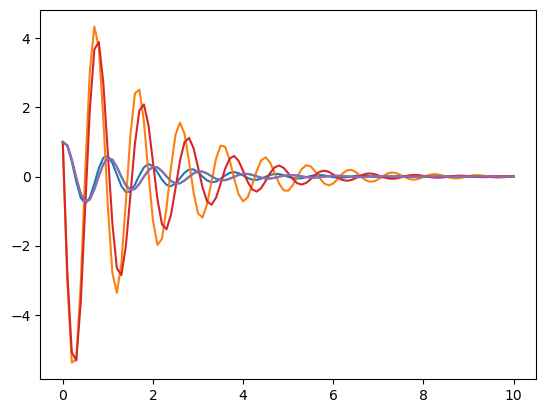

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time,Y_rk2[:,0]) #me dibuja t vs x rk2
plt.plot(time, Y_rk2[:,1]) #me dibuja t vs v rk2
plt.plot(time, Y_rk4[:,0]) #me dibija t vs c rk4
plt.plot(time, Y_rk4[:,1]) #me dibuja t vs v rk4
plt.plot(time, ground_truth_subamortiguado(time, m, c, k, x0= 1, v0=1)[0])